In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import csv
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

csvpath = os.path.join('owid-covid-data.csv')

In [3]:
covid = pd.read_csv("owid-covid-data.csv", dtype="object", encoding="utf-8")
covid.head()

,iso_code,continent,location,month,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,02-2020,24/02/2020,1,1,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,02-2020,25/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02-2020,26/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,02-2020,27/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,02-2020,28/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


<AxesSubplot:>

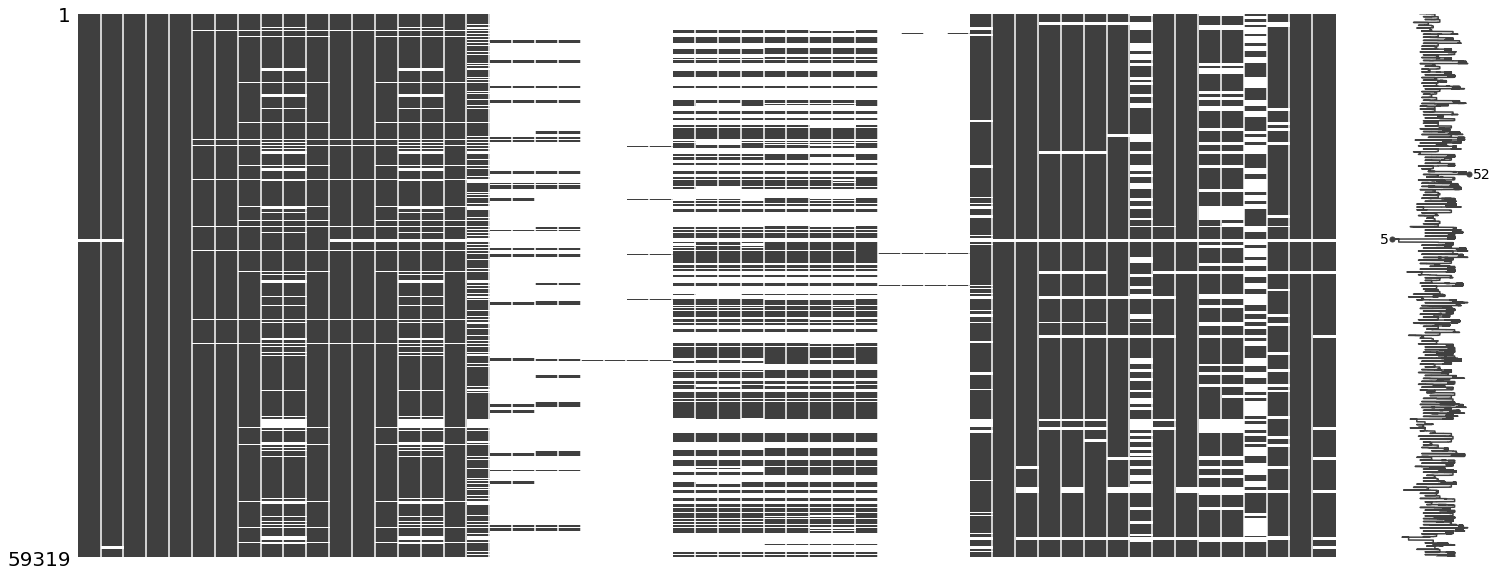

In [4]:
msno.matrix(covid)

In [5]:
covid.describe

<bound method NDFrame.describe of       iso_code continent     location    month        date total_cases  \
0          AFG      Asia  Afghanistan  02-2020  24/02/2020           1   
1          AFG      Asia  Afghanistan  02-2020  25/02/2020           1   
2          AFG      Asia  Afghanistan  02-2020  26/02/2020           1   
3          AFG      Asia  Afghanistan  02-2020  27/02/2020           1   
4          AFG      Asia  Afghanistan  02-2020  28/02/2020           1   
...        ...       ...          ...      ...         ...         ...   
59314      ZWE    Africa     Zimbabwe  01-2021   6/01/2021       17804   
59315      ZWE    Africa     Zimbabwe  01-2021   7/01/2021       18675   
59316      ZWE    Africa     Zimbabwe  01-2021   8/01/2021       19660   
59317      ZWE    Africa     Zimbabwe  01-2021   9/01/2021       20499   
59318      ZWE    Africa     Zimbabwe  01-2021  10/01/2021       21477   

      new_cases new_cases_smoothed total_deaths new_deaths  ...  \
0         

In [6]:
covid.count()

iso_code                              58980
continent                             58624
location                              59319
month                                 59319
date                                  59319
total_cases                           58772
new_cases                             58765
new_cases_smoothed                    57810
total_deaths                          50365
new_deaths                            50364
new_deaths_smoothed                   57810
total_cases_per_million               58433
new_cases_per_million                 58426
new_cases_smoothed_per_million        57476
total_deaths_per_million              50039
new_deaths_per_million                50038
new_deaths_smoothed_per_million       57476
reproduction_rate                     44995
icu_patients                           6129
icu_patients_per_million               6129
hosp_patients                          6867
hosp_patients_per_million              6867
weekly_icu_admissions           

In [7]:
#organized_df = covid[["continent", "location", "date", "total_cases","total_deaths","gdp_per_capita", "hospital_beds_per_thousand", "new_cases", "median_age", "population", "aged_65_older", "aged_70_older","total_tests" ]]
#organized_df = covid[["continent", "location", "date", "new_cases", "new_deaths", "gdp_per_capita", "hospital_beds_per_thousand", "median_age"]]
#organized_df = covid[["continent", "location", "date", "new_deaths", "hospital_beds_per_thousand"]]

In [8]:
organized_df = covid[["continent", "location", "new_deaths", "hospital_beds_per_thousand"]]

In [9]:
organized_df.head()

,continent,location,new_deaths,hospital_beds_per_thousand
0,Asia,Afghanistan,NaN,0.5
1,Asia,Afghanistan,NaN,0.5
2,Asia,Afghanistan,NaN,0.5
3,Asia,Afghanistan,NaN,0.5
4,Asia,Afghanistan,NaN,0.5


In [10]:
organized_df.count()

continent                     58624
location                      59319
new_deaths                    50364
hospital_beds_per_thousand    52429
dtype: int64

In [11]:
organized_df = organized_df.dropna(how='any')

In [12]:
organized_df.count()

continent                     44409
location                      44409
new_deaths                    44409
hospital_beds_per_thousand    44409
dtype: int64

In [13]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand
27,Asia,Afghanistan,1,0.5
28,Asia,Afghanistan,0,0.5
29,Asia,Afghanistan,0,0.5
30,Asia,Afghanistan,1,0.5
31,Asia,Afghanistan,1,0.5
...,...,...,...,...
59314,Africa,Zimbabwe,13,1.7
59315,Africa,Zimbabwe,15,1.7
59316,Africa,Zimbabwe,22,1.7
59317,Africa,Zimbabwe,15,1.7


In [14]:
#check the data type
print(organized_df.dtypes)

continent                     object
location                      object
new_deaths                    object
hospital_beds_per_thousand    object
dtype: object


In [15]:
# Use pd.to_numeric() method to convert the datatype of the new_deaths & hospital_beds_per_thousand column
organized_df['new_deaths'] = pd.to_numeric(organized_df['new_deaths'])
organized_df['hospital_beds_per_thousand'] = pd.to_numeric(organized_df['hospital_beds_per_thousand'])

In [16]:
#check the data type again
print(organized_df.dtypes)

continent                      object
location                       object
new_deaths                      int64
hospital_beds_per_thousand    float64
dtype: object


# Total deaths VS Hospital beds per thousand

In [17]:
# The sum method adds every entry in the series
total1 = organized_df["new_deaths"].sum()
total1

1927389

In [18]:
# The mean method averages the series
average1 = organized_df["new_deaths"].mean()
average1

43.400864689589945

In [19]:
# The sum method adds every entry in the series
total2 = organized_df["hospital_beds_per_thousand"].sum()
total2

136376.92500000002

In [20]:
# The mean method averages the series
average2 = organized_df["hospital_beds_per_thousand"].mean()
average2

3.0709298790785655

In [21]:
# The unique method shows every element of the series that appears only once
unique1 = organized_df["location"].unique()
unique1

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakh

In [22]:
# The unique method shows every element of the series that appears only once
unique2 = organized_df["continent"].unique()
unique2

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [23]:
# The value_counts method counts unique values in a column
count1 = organized_df["continent"].value_counts()
count1

Europe           12935
Asia             11176
Africa           10628
North America     5352
South America     3550
Oceania            768
Name: continent, dtype: int64

In [24]:
# The value_counts method counts unique values in a column
count2 = organized_df["location"].value_counts()
count2

China          354
Philippines    344
Japan          333
France         331
Iran           327
              ... 
Vietnam        164
Fiji           164
Saint Lucia     62
Eritrea         20
Mongolia        13
Name: location, Length: 155, dtype: int64

In [25]:
organized_df.describe()

,new_deaths,hospital_beds_per_thousand
count,44409.000000,44409.000000
mean,43.400865,3.070930
std,173.866322,2.525701
min,-1918.000000,0.100000
25%,0.000000,1.300000
50%,1.000000,2.400000
75%,13.000000,4.210000
max,4194.000000,13.800000


In [26]:
# Create a new DataFrame that looks into a specific region (eg: Italy)
Italy_df = organized_df.loc[organized_df["location"] == "Italy"]
Italy_df

,continent,location,new_deaths,hospital_beds_per_thousand
26268,Europe,Italy,1,3.18
26269,Europe,Italy,1,3.18
26270,Europe,Italy,1,3.18
26271,Europe,Italy,4,3.18
26272,Europe,Italy,3,3.18
...,...,...,...,...
26588,Europe,Italy,548,3.18
26589,Europe,Italy,414,3.18
26590,Europe,Italy,620,3.18
26591,Europe,Italy,483,3.18


In [27]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand
27,Asia,Afghanistan,1,0.5
28,Asia,Afghanistan,0,0.5
29,Asia,Afghanistan,0,0.5
30,Asia,Afghanistan,1,0.5
31,Asia,Afghanistan,1,0.5
...,...,...,...,...
59314,Africa,Zimbabwe,13,1.7
59315,Africa,Zimbabwe,15,1.7
59316,Africa,Zimbabwe,22,1.7
59317,Africa,Zimbabwe,15,1.7


In [28]:
# It is also possible to group a DataFrame by multiple columns
# This returns an object with multiple indexes, however, which can be harder to deal with
grouped_international_data = organized_df.groupby(['continent', 'location'])

grouped_international_data.count().head(20)

new_deaths  hospital_beds_per_thousand
continent location                                                        
Africa    Algeria                          305                         305
          Benin                            280                         280
          Botswana                         286                         286
          Burkina Faso                     299                         299
          Burundi                          273                         273
          Cameroon                         292                         292
          Cape Verde                       293                         293
          Central African Republic         233                         233
          Comoros                          250                         250
          Djibouti                         276                         276
          Egypt                            309                         309
          Equatorial Guinea                264                         264
          Eritrea                           20                          20
          Eswatini                         270                         270
          Ethiopia                         281                         281
          Gabon                            297                         297
          Gambia                           294                         294
          Ghana                            296                         296
          Guinea                           271                         271
          Kenya                            291                         291

In [29]:
grouped_international_data = organized_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','hospital_beds_per_thousand':'mean'})
grouped_international_data

new_deaths  hospital_beds_per_thousand
continent     location                                            
Africa        Algeria             2807                         1.9
              Benin                 44                         0.5
              Botswana              48                         1.8
              Burkina Faso          89                         0.4
              Burundi                2                         0.8
...                                ...                         ...
South America Paraguay            2405                         1.3
              Peru               38049                         1.6
              Suriname             133                         3.1
              Uruguay              256                         2.8
              Venezuela           1061                         0.8

[155 rows x 2 columns]

In [30]:
# Rename columns for readability
covid_renamed_df = grouped_international_data.rename(columns={"new_deaths": "Total deaths", "hospital_beds_per_thousand": "Hospital beds per thousand"})
covid_renamed_df

Total deaths  Hospital beds per thousand
continent     location                                              
Africa        Algeria               2807                         1.9
              Benin                   44                         0.5
              Botswana                48                         1.8
              Burkina Faso            89                         0.4
              Burundi                  2                         0.8
...                                  ...                         ...
South America Paraguay              2405                         1.3
              Peru                 38049                         1.6
              Suriname               133                         3.1
              Uruguay                256                         2.8
              Venezuela             1061                         0.8

[155 rows x 2 columns]

In [31]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_high = covid_renamed_df.sort_values("Hospital beds per thousand", ascending=False)
hospital_beds_per_thousand_high.head()

Total deaths  Hospital beds per thousand
continent location                                             
Europe    Monaco                  4                       13.80
Asia      Japan                3850                       13.05
          South Korea          1140                       12.27
Europe    Belarus              1517                       11.00
          Ukraine             20641                        8.80

In [32]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_low = covid_renamed_df.sort_values("Hospital beds per thousand")
hospital_beds_per_thousand_low.head()

Total deaths  Hospital beds per thousand
continent location                                            
Africa    Mali                 298                         0.1
          Madagascar           267                         0.2
          Niger                126                         0.3
          Ethiopia            1994                         0.3
          Guinea                81                         0.3

In [33]:
# Sorting the DataFrame based on "Total deaths" column
total_deaths_high = covid_renamed_df.sort_values("Total deaths", ascending=False)
total_deaths_high.head()

,,Total deaths,Hospital beds per thousand
continent,location,,
North America,United States,374322,2.77
South America,Brazil,203100,2.20
Asia,India,151160,0.53
North America,Mexico,133706,1.38
Europe,United Kingdom,81567,2.54


In [34]:
# Sorting the DataFrame based on "hospital_beds_per_thousand" column
total_deaths_low = covid_renamed_df.sort_values("Total deaths")
total_deaths_low.head()

Total deaths  Hospital beds per thousand
continent location                                          
Oceania   Fiji                 2                         2.3
Africa    Burundi              2                         0.8
Asia      Mongolia             2                         7.0
          Brunei               3                         2.7
Africa    Eritrea              3                         0.7

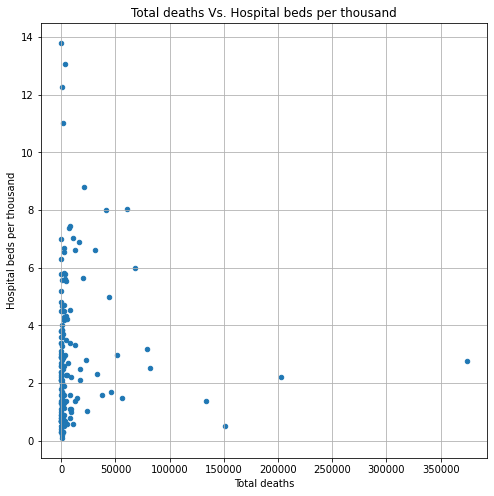

In [35]:
# Create a scatter plot which compares total deaths to hospital beds per thousand
covid_renamed_df.plot(kind="scatter", x="Total deaths", y="Hospital beds per thousand", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.show()

In [59]:
sort = covid_renamed_df.sort_values("Total deaths", ascending=False)
without_outliers = sort[2:]
without_outliers

Total deaths  Hospital beds per thousand
continent     location                                                
Asia          India                 151160                        0.53
North America Mexico                133706                        1.38
Europe        United Kingdom         81567                        2.54
              Italy                  78755                        3.18
              France                 67885                        5.98
...                                    ...                         ...
Africa        Eritrea                    3                        0.70
Asia          Brunei                     3                        2.70
Africa        Burundi                    2                        0.80
Asia          Mongolia                   2                        7.00
Oceania       Fiji                       2                        2.30

[153 rows x 2 columns]

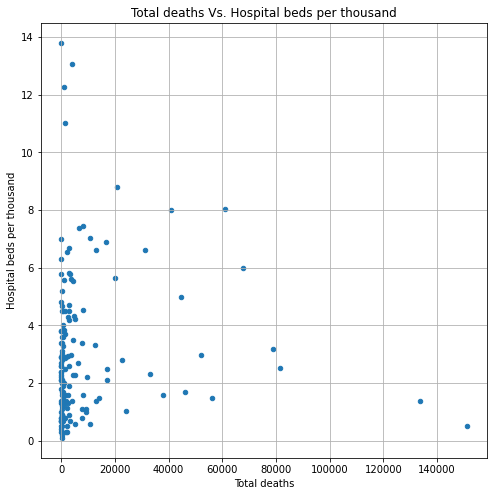

In [60]:
# Create a scatter plot which compares total deaths to hospital beds per thousand
without_outliers.plot(kind="scatter", x="Total deaths", y="Hospital beds per thousand", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.show()

In [38]:
# Compute the Pearson correlation coefficient between "Total deaths" and "Hospital beds per thousand"
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
correlation = st.pearsonr(Total_deaths,Hospital_beds_per_thousand)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.0021324988


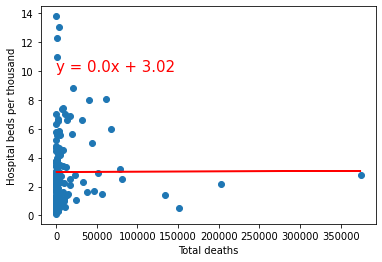

In [39]:
# Add the linear regression equation and line to plot
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

The r-squared is: 4.5475513305018905e-06


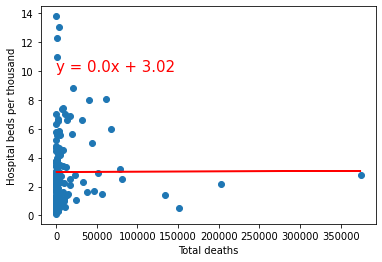

In [40]:
# Print out the r-squared value along with the plot.
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
print(f"The r-squared is: {rvalue**2}")
plt.show()

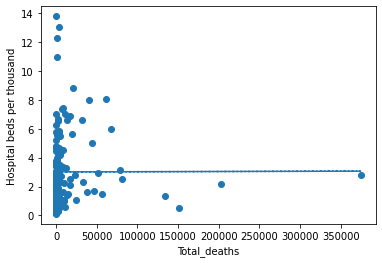

In [41]:
# Perform a linear regression on total deaths versus hospital beds per thousand
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Total_deaths, Hospital_beds_per_thousand)

# Create equation of line to calculate predicted hospital beds per thousand
vc_fit = vc_slope * Total_deaths + vc_int

# Plot the linear model on top of scatter plot 
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
plt.scatter(Total_deaths,Hospital_beds_per_thousand)
plt.plot(Total_deaths,vc_fit,"--")
##plt.xticks(Total deaths, rotation=90)???
plt.xlabel('Total_deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

In [42]:
#organized_df['continent'].value_counts()

In [43]:
#organized_df['date'] = pd.to_datetime(organized_df["date"])
#organized_df['date']

In [44]:
#organized_df['mnth_yr'] = organized_df['date'].apply(lambda x: x.strftime('%B-%Y')) 
#organized_df['month_year'] = organized_df['date'].dt.strftime('%B-%Y')
#organized_df

In [45]:
#organized_df["year"] = organized_df["date"].dt.year
#organized_df["month"] = organized_df["date"].dt.month
#organized_df

In [46]:
#organized_group = organized_df.groupby(["location", "continent"]).sum()
#organized_group = organized_df.groupby(["location", "continent", "new_deaths", "hospital_beds_per_thousand"]).sum()
#organized_group

# Total Deaths vs Median age


In [47]:
#

# Total Deaths and Total GDP

In [48]:
#

# Total Deaths vs Total Cases

In [96]:
#getting the required columns
organized4_df = covid[["continent", "location", "new_deaths", "new_cases", "total_deaths", "total_cases"]].copy()
organized4_df = organized4_df.dropna(how='any')
organized4_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
27,Asia,Afghanistan,1,4,1,34
28,Asia,Afghanistan,0,7,1,41
29,Asia,Afghanistan,0,2,1,43
30,Asia,Afghanistan,1,33,2,76
31,Asia,Afghanistan,1,4,3,80
...,...,...,...,...,...,...
59314,Africa,Zimbabwe,13,610,431,17804
59315,Africa,Zimbabwe,15,871,446,18675
59316,Africa,Zimbabwe,22,985,468,19660
59317,Africa,Zimbabwe,15,839,483,20499


In [97]:
#checking the data type
organized4_df.dtypes

continent       object
location        object
new_deaths      object
new_cases       object
total_deaths    object
total_cases     object
dtype: object

In [98]:
#change the data type to numerical
organized4_df['new_deaths'] = pd.to_numeric(organized4_df['new_deaths'])
organized4_df['new_cases'] = pd.to_numeric(organized4_df['new_cases'])
organized4_df['total_deaths'] = pd.to_numeric(organized4_df['total_deaths'])
organized4_df['total_cases'] = pd.to_numeric(organized4_df['total_cases'])
#rechecking
organized4_df.dtypes

continent       object
location        object
new_deaths       int64
new_cases        int64
total_deaths     int64
total_cases      int64
dtype: object

In [64]:
# The sum method adds every entry in the series
total_death = organized4_df["new_deaths"].sum()
print(f"Sum of total death = {total_death}")

total_case = organized4_df["new_cases"].sum()
print(f"Sum of total cases = {total_case}")

# getting the mean of both
avg_death = organized4_df["new_deaths"].mean()
avg_cases = organized4_df["new_cases"].mean()
print(f"Mean of total death = {avg_death}")
print(f"Mean of total cases = {avg_cases}")

Sum of total death = 1934532
Sum of total cases = 89425767
Mean of total death = 38.9382875085544
Mean of total cases = 1799.9631053500261


In [65]:
organized4_df.describe()

,new_deaths,new_cases
count,49682.000000,49682.000000
mean,38.938288,1799.963105
std,164.893166,9428.683972
min,-1918.000000,-46076.000000
25%,0.000000,6.000000
50%,1.000000,82.000000
75%,10.000000,621.000000
max,4194.000000,302506.000000


In [66]:
# checking each country
grouped_inter_data = organized4_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','new_cases':'sum'})

# renaming the columns
covid_renamed4_df = grouped_inter_data.rename(columns={"new_deaths": "Total deaths", "new_cases": "Total Cases"})
covid_renamed4_df

Total deaths  Total Cases
continent     location                               
Africa        Algeria               2807       102124
              Angola                 416        18188
              Benin                   44         3282
              Botswana                48        16047
              Burkina Faso            89         8067
...                                  ...          ...
South America Paraguay              2405       115720
              Peru                 38049      1025946
              Suriname               133         6998
              Uruguay                256        25912
              Venezuela             1061       116503

[175 rows x 2 columns]

In [67]:
# the most total death and least has been printed in the beginning

# getting the most total cases
total_cases_high4 = covid_renamed4_df.sort_values("Total Cases", ascending=False)
total_cases_high4.head()

Total deaths  Total Cases
continent     location                                 
North America United States         374322     22406730
Asia          India                 151160     10466539
South America Brazil                203100      8105590
Europe        Russia                 60963      3366568
              United Kingdom         81567      3081073

In [68]:
# getting the least total cases
total_cases_low4 = covid_renamed4_df.sort_values("Total Cases")
total_cases_low4.head()

,,Total deaths,Total Cases
continent,location,,
Oceania,Fiji,2,26
Asia,Brunei,3,58
North America,Antigua and Barbuda,5,161
Asia,Mongolia,2,267
North America,Saint Lucia,5,297


The r-squared is: 0.9115186271439102


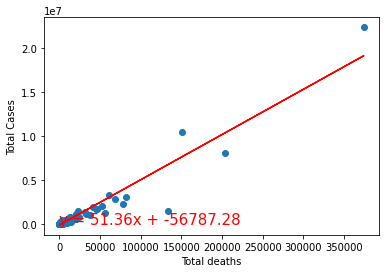

In [73]:
# making plot
lines = covid_renamed4_df.plot.scatter(x='Total deaths', y='Total Cases')

# Print out the r-squared value along with the plot.
x_values = covid_renamed4_df['Total deaths']
y_values = covid_renamed4_df['Total Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Total Cases')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [80]:
covid_renamed4_df = covid_renamed4_df.reset_index()

In [100]:
covid_renamed4_df = organized4_df[organized4_df["location"] == "United States"]
covid_renamed4_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
56138,North America,United States,1,8,1,25
56139,North America,United States,0,7,1,32
56140,North America,United States,5,23,6,55
56141,North America,United States,1,19,7,74
56142,North America,United States,4,33,11,107
...,...,...,...,...,...,...
56450,North America,United States,3854,250381,361123,21354750
56451,North America,United States,4194,280741,365317,21635491
56452,North America,United States,3939,292521,369256,21928012
56453,North America,United States,3252,264830,372508,22192842


<AxesSubplot:xlabel='total_deaths'>

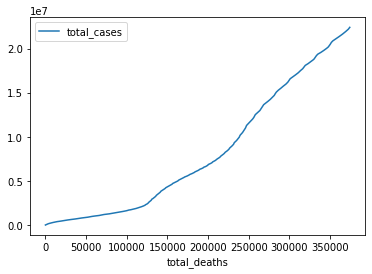

In [101]:
#line graph
covid_renamed4_df.plot(x='total_deaths', y='total_cases')

In [ ]:
# Export file as a CSV, without the Pandas index, but with the header
#organized_df.to_csv("fileOne.csv", index=False, header=True)